In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

import numpy as np

import seaborn as sns
import matplotlib.ticker as ticker

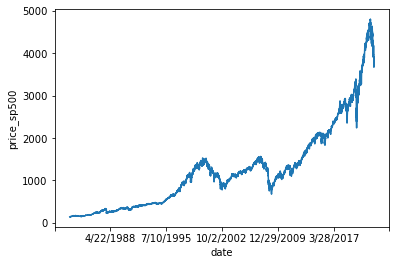

In [9]:
dataset = pd.read_csv('./full_dataset.csv').drop(['ask'], axis = 1)
feature_names = ['date', 'price_eurusd', 'change_eurusd', 'price_sp500', 'change_sp500']

plot = sns.lineplot(x = dataset['date'], y = dataset['price_sp500'])
plot.xaxis.set_major_locator(ticker.LinearLocator(7))

dataset['date'] = dataset['date'].rank(method='dense').astype(int)

x_data = StandardScaler().fit_transform(dataset.drop(['bid'], axis = 1))
y_data = dataset['bid']


# print(y.shape)
# print(x.shape)
# # dataset


In [18]:
model = Sequential(name="Input")
model.add(LSTM(units = 256, return_sequences = True, input_shape=x_data.shape))
model.add(LSTM(units = 128, return_sequences = True))
model.add(LSTM(units = 64, return_sequences = True, activation='selu'))
model.add(Dense(units = 32))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
print(x_data.shape)

x_train = []
y_train = []

for i in range()


model.fit(x_data, y_data, epochs=100, batch_size=32)

(9942, 11)
Epoch 1/100


ValueError: in user code:

    File "c:\Users\chris\miniconda3\envs\lstm\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\chris\miniconda3\envs\lstm\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\chris\miniconda3\envs\lstm\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\chris\miniconda3\envs\lstm\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\chris\miniconda3\envs\lstm\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\chris\miniconda3\envs\lstm\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "Input" is incompatible with the layer: expected shape=(None, 9942, 11), found shape=(None, 11)
